# <font color='green'>Projeto Data Science - Machine Learning Clusterização</font>

# <font color='green'>Agrupamento de Clientes Por Consumo de Energia</font>

No ambiente de negócios atual, entender o cliente é mais importante do que nunca. Clientes não são um grupo homogêneo; eles têm necessidades, comportamentos e preferências distintas. A clusterização de clientes nos permite agrupar indivíduos com características semelhantes, revelando segmentos de mercado que, de outra forma, passariam despercebidos.

Com esses segmentos identificados, as empresas podem:

**Personalizar Campanhas de Marketing**: Em vez de uma abordagem "tamanho único", as empresas podem criar mensagens e ofertas direcionadas que ressoam com cada grupo de clientes, aumentando a eficácia das campanhas e o ROI.

**Otimizar o Desenvolvimento de Produtos**: Ao entender as necessidades específicas de cada segmento, as empresas podem desenvolver produtos e serviços que atendam melhor às expectativas de seus clientes, impulsionando a satisfação e a lealdade.

**Melhorar a Experiência do Cliente**: Conhecer os diferentes perfis de clientes ajuda a personalizar o atendimento, a comunicação e as interações, criando uma experiência mais relevante e satisfatória.

**Identificar Clientes de Alto Valor e Risco**: É possível segmentar clientes por valor de vida útil (LTV) ou propensão a churn (abandono), permitindo que as empresas foquem seus esforços em reter os clientes mais valiosos e mitigar riscos.

Nesse projeto, retiramos todas as informações provenientes desse site: https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

# Clusterização de clientes por consumo de energia

Para iniciar nosso projeto, será carregado todas as bibliotecas necessárias para desenvolvimento do modelo de cluster, vindo das principais que são Sklearn e Scipy. Após isso, será realizado o carregamento do Dataset em formato txt para manipulação e análise exploratória dos dados.

In [ ]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
# Carregando os dados
dataset = pd.read_csv('consumo_energia.txt', delimiter = ';')

In [ ]:
# Visualizando informações do Dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196984 entries, 0 to 196983
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   196984 non-null  object 
 1   Time                   196984 non-null  object 
 2   Global_active_power    196984 non-null  object 
 3   Global_reactive_power  196984 non-null  object 
 4   Voltage                196984 non-null  object 
 5   Global_intensity       196984 non-null  object 
 6   Sub_metering_1         196983 non-null  object 
 7   Sub_metering_2         196983 non-null  object 
 8   Sub_metering_3         193251 non-null  float64
dtypes: float64(1), object(8)
memory usage: 13.5+ MB


In [ ]:
# Visualizando as primeiras linhas com head
dataset.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
# Traduzindo os dados para melhor entendimento
dataset.columns = ['data', 'hora', 'Energia_ativa_global', 'Energia_reativa_global', 'Tensão', 'Intensidade_global', 'Medição_sub_1', 'Medição_sub_2', 'Medição_sub_3']
dataset.head()

,data,hora,Energia_ativa_global,Energia_reativa_global,Tensão,Intensidade_global,Medição_sub_1,Medição_sub_2,Medição_sub_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
# Tamanho do Dataset
dataset.shape

(196984, 9)

In [ ]:
# Visualizando dtypes
dataset.dtypes

,0
data,object
hora,object
Energia_ativa_global,object
Energia_reativa_global,object
Tensão,object
Intensidade_global,object
Medição_sub_1,object
Medição_sub_2,object
Medição_sub_3,float64


In [ ]:
# Checando se há dados faltantes
dataset.isnull().sum()

,0
data,0
hora,0
Energia_ativa_global,0
Energia_reativa_global,0
Tensão,0
Intensidade_global,0
Medição_sub_1,1
Medição_sub_2,1
Medição_sub_3,3733


In [ ]:
# Removendo registros nulos e excluindo as duas primeiras colunas (não são necessárias)
dataset = dataset.iloc[0:, 2:9].dropna()

In [ ]:
# Transformando os tipos das variáveis em float64
dataset = dataset.astype('float64')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193251 entries, 0 to 196982
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Energia_ativa_global    193251 non-null  float64
 1   Energia_reativa_global  193251 non-null  float64
 2   Tensão                  193251 non-null  float64
 3   Intensidade_global      193251 non-null  float64
 4   Medição_sub_1           193251 non-null  float64
 5   Medição_sub_2           193251 non-null  float64
 6   Medição_sub_3           193251 non-null  float64
dtypes: float64(7)
memory usage: 11.8 MB


In [ ]:
dataset.head()

,Energia_ativa_global,Energia_reativa_global,Tensão,Intensidade_global,Medição_sub_1,Medição_sub_2,Medição_sub_3
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
# Checando novamente se há valores faltantes
dataset.isnull().values.any()

np.False_

In [ ]:
dataset.isnull().sum()

,0
Energia_ativa_global,0
Energia_reativa_global,0
Tensão,0
Intensidade_global,0
Medição_sub_1,0
Medição_sub_2,0
Medição_sub_3,0


In [ ]:
# Obtendo valores dos atributos para extração de valores
dataset_atrib = dataset.values

In [ ]:
dataset_atrib

array([[4.2160e+00, 4.1800e-01, 2.3484e+02, ..., 0.0000e+00, 1.0000e+00,
        1.7000e+01],
       [5.3600e+00, 4.3600e-01, 2.3363e+02, ..., 0.0000e+00, 1.0000e+00,
        1.6000e+01],
       [5.3740e+00, 4.9800e-01, 2.3329e+02, ..., 0.0000e+00, 2.0000e+00,
        1.7000e+01],
       ...,
       [1.5600e+00, 0.0000e+00, 2.3311e+02, ..., 0.0000e+00, 2.5000e+01,
        0.0000e+00],
       [1.9000e-01, 0.0000e+00, 2.3482e+02, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.2960e+00, 0.0000e+00, 2.3436e+02, ..., 0.0000e+00, 1.8000e+01,
        0.0000e+00]])

In [ ]:
# Coleta uma amostra de 1% dos dados pra não comprometer a memória do computador
amostra1, amostra2 = train_test_split(dataset_atrib, train_size = .01)

In [ ]:
amostra1

array([[5.0800e-01, 1.2800e-01, 2.4302e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.2000e-01, 0.0000e+00, 2.4257e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.9720e+00, 9.2000e-02, 2.3841e+02, ..., 0.0000e+00, 0.0000e+00,
        1.7000e+01],
       ...,
       [2.6400e-01, 0.0000e+00, 2.4397e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.5340e+00, 2.1800e-01, 2.4249e+02, ..., 0.0000e+00, 1.0000e+00,
        1.8000e+01],
       [1.7620e+00, 3.2800e-01, 2.4325e+02, ..., 0.0000e+00, 2.0000e+00,
        0.0000e+00]])

In [ ]:
amostra1.shape

(1932, 7)

In [ ]:
# Aplica redução de dimensionalidade
# Transforma as 7 variáveis em 2 variaveis principais. Esse método utiliza Algebra Linear pra identificar semelhança
# entre os dados e assim "juntar" as variaveis, medindo a semelhança pela variância.
pca = PCA(n_components = 2).fit_transform(amostra1)

In [ ]:
# Determinando um range de k
k_range = range(1,12)

In [ ]:
# Aplicando o modelo K-Means para cada valor de K (esta célula pode levar bastante tempo para ser executada)
k_means_var = [KMeans(n_clusters = k).fit(pca) for k in k_range]

In [ ]:
# Ajustando o Centróide do cluster para cada modelo
centroids = [x.cluster_centers_ for x in k_means_var]

In [ ]:
# Calculando a distância Euclidiana de cada ponto de dado do centróide
k_euclid = [cdist(pca, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]

In [ ]:
# Soma dos quadrados da distâncias dentro do cluster
soma_quadrados_intra_cluster = [sum(d**2) for d in dist]

In [ ]:
# Soma total dos quadrados
soma_total = sum(pdist(pca)**2)/pca.shape[0]

In [ ]:
# Soma dos quadrados entre os clusters
soma_quadrados_inter_cluster = soma_total - soma_quadrados_intra_cluster

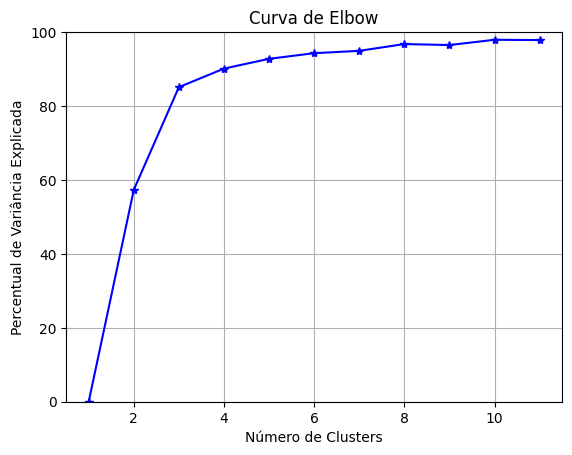

In [ ]:
# Curva de elbow
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, soma_quadrados_inter_cluster/soma_total * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Número de Clusters')
plt.ylabel('Percentual de Variância Explicada')
plt.title('Curva de Elbow')
plt.show()

In [ ]:
# Criando o modelo com k = 8
modelo_v1 = KMeans(n_clusters = 8)
modelo_v1.fit(pca)

KMeans()

In [ ]:
# Obterem os valores mínimos e máximos e organiza o shape
x_min, x_max = pca[:, 0].min() - 5, pca[:, 0].max() - 1
y_min, y_max = pca[:, 1].min() + 1, pca[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
z = modelo_v1.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

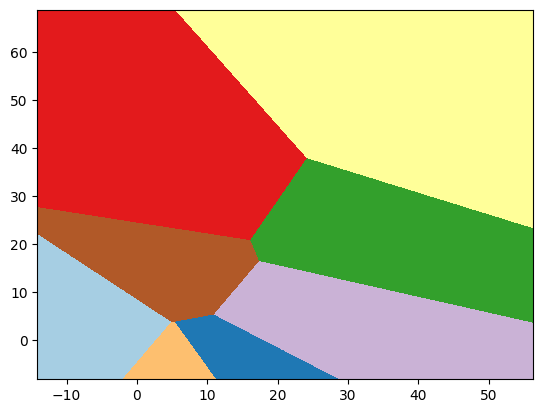

In [ ]:
# Plot das área dos clusters
plt.figure(1)
plt.clf()
plt.imshow(z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

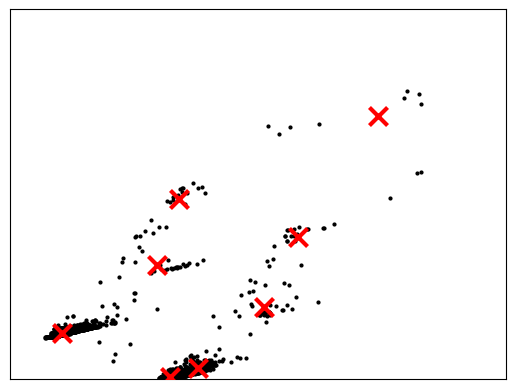

In [ ]:
# Plot dos centróides
plt.plot(pca[:, 0], pca[:, 1], 'k.', markersize = 4)
centroids = modelo_v1.cluster_centers_
inert = modelo_v1.inertia_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 169, linewidths = 3, color = 'r', zorder = 8)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
#?silhouette_score

In [ ]:
# Silhouette Score
labels = modelo_v1.labels_
silhouette_score(pca, labels, metric = 'euclidean')

np.float64(0.778785068618871)

In [ ]:
# Criando um modelo com k = 10
modelo_v2 = KMeans(n_clusters = 10)
modelo_v2.fit(pca)

KMeans(n_clusters=10)

In [ ]:
# Obtém os valores mínimos e máximos e organiza o shape
x_min, x_max = pca[:, 0].min() - 5, pca[:, 0].max() - 1
y_min, y_max = pca[:, 1].min() + 1, pca[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = modelo_v2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

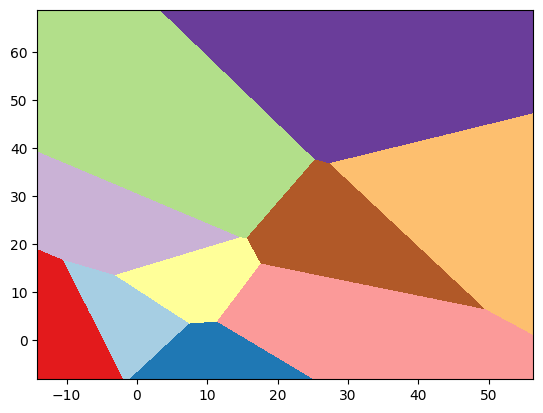

In [ ]:
# Plot das áreas dos clusters
plt.figure(1)
plt.clf()
plt.imshow(Z,
           interpolation = 'nearest',
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Paired,
           aspect = 'auto',
           origin = 'lower')

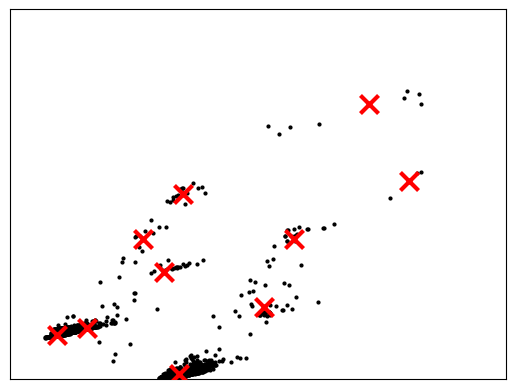

In [ ]:
# Plot dos centróides
plt.plot(pca[:, 0], pca[:, 1], 'k.', markersize = 4)
centroids = modelo_v2.cluster_centers_
inert = modelo_v2.inertia_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 169, linewidths = 3, color = 'r', zorder = 8)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
# Silhouette Score -- utilizamos para avaliar se o numero de cluster é o ideal... mais proximo de 1 melhor... e -1 pior...
labels = modelo_v2.labels_
silhouette_score(pca, labels, metric = 'euclidean')

np.float64(0.7381801578708669)

Criando o Cluster Map com os clusters do Modelo V1 que apresentou melhor Silhouette Score.

In [ ]:
# Lista com nomes das colunas
names = ['Energia_ativa_global', 'Energia_reativa_global', 'Tensão', 'Intensidade_global', 'Medição_sub_1', 'Medição_sub_2', 'Medição_sub_3']

In [ ]:
# Cria o Cluster Map
cluster_map = pd.DataFrame(amostra1, columns= names)
cluster_map['Energia_ativa_global'] = pd.to_numeric(cluster_map['Energia_ativa_global'])
cluster_map['cluster'] = modelo_v1.labels_

In [ ]:
cluster_map

,Energia_ativa_global,Energia_reativa_global,Tensão,Intensidade_global,Medição_sub_1,Medição_sub_2,Medição_sub_3,cluster
0,0.508,0.128,243.02,2.4,0.0,0.0,0.0,0
1,0.220,0.000,242.57,0.8,0.0,0.0,0.0,0
2,1.972,0.092,238.41,8.4,0.0,0.0,17.0,4
3,0.384,0.220,243.70,1.8,0.0,2.0,0.0,0
4,0.346,0.152,241.80,1.6,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
1927,1.726,0.000,243.51,7.2,0.0,0.0,19.0,4
1928,0.578,0.240,241.32,2.8,0.0,1.0,0.0,0
1929,0.264,0.000,243.97,1.2,0.0,0.0,0.0,0
1930,1.534,0.218,242.49,6.4,0.0,1.0,18.0,4


In [ ]:
# Calcula a média de consumo de energia por cluster
cluster_map.groupby('cluster')['Energia_ativa_global'].mean()

,Energia_ativa_global
cluster,
0,0.640586
1,3.184374
2,4.352750
3,2.890632
4,1.591536
5,3.990634
6,6.682364
7,3.143622


In [ ]:
# Calcula a quantidade de observaçõe por cluster
cluster_map.groupby('cluster')['Energia_ativa_global'].count()

,Energia_ativa_global
cluster,
0,1208
1,187
2,24
3,19
4,405
5,41
6,11
7,37


## Gerando Cluster com dados normalizados

In [ ]:
# Obterm os valores dos atributos
dataset_atrib = dataset.values

In [ ]:
# Importa a biblioteca para fazer a normalização
from sklearn.preprocessing import MinMaxScaler

# Cria o objeto para normalizar os dados
Padronizador = MinMaxScaler() # Instantiate MinMaxScaler
dataset_atrib = Padronizador.fit_transform(dataset_atrib)

amostra1, amostra2 = train_test_split(dataset_atrib, train_size = .01) # Correct function name
pca = PCA(n_components = 2).fit_transform(amostra1)
k_range = range(1,12)
k_means_var = [KMeans(n_clusters = k).fit(pca) for k in k_range]
centroids = [x.cluster_centers_ for x in k_means_var]
k_euclid = [cdist(pca, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]
soma_quadrados_intra_cluster = [sum(d**2) for d in dist]
soma_total = sum(pdist(pca)**2)/pca.shape[0]
# Soma dos quadrados intra_cluster
soma_quadrados_inter_cluster = soma_total - soma_quadrados_intra_cluster
# Criando um modelo com K = 8
modelo_v1 = KMeans(n_clusters = 8)
modelo_v1.fit(pca)
# Obtém os valores mínimos e máximos e organiza o shape
x_min, x_max = pca[:, 0].min() - 5, pca[:, 0].max() - 1
y_min, y_max = pca[:, 1].min() + 1, pca[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = modelo_v1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Silhouette Score
labels = modelo_v1.labels_
silhouette_score(pca, labels, metric = 'euclidean')
# Lista com nomes das colunas
names = ['Energia_ativa_global', 'Energia_reativa_global', 'Tensão', 'Intensidade_global', 'Medição_sub_1', 'Medição_sub_2', 'Medição_sub_3']

# Cria o cluster map
cluster_map = pd.DataFrame(amostra1, columns= names)
cluster_map['Energia_ativa_global'] = pd.to_numeric(cluster_map['Energia_ativa_global'])
cluster_map['cluster'] = modelo_v1.labels_
cluster_map

,Energia_ativa_global,Energia_reativa_global,Tensão,Intensidade_global,Medição_sub_1,Medição_sub_2,Medição_sub_3,cluster
0,0.046186,0.258581,0.550514,0.052174,0.000000,0.012821,0.00,2
1,0.128147,0.000000,0.526409,0.126087,0.000000,0.000000,0.85,1
2,0.020064,0.082380,0.637717,0.021739,0.000000,0.000000,0.00,6
3,0.055839,0.260870,0.650479,0.056522,0.000000,0.000000,0.00,2
4,0.192126,0.086957,0.569656,0.182609,0.000000,0.012821,0.90,1
...,...,...,...,...,...,...,...,...
1927,0.218247,0.118993,0.537398,0.208696,0.000000,0.000000,0.00,5
1928,0.018929,0.148741,0.727047,0.021739,0.000000,0.000000,0.00,6
1929,0.021389,0.105263,0.466501,0.021739,0.012987,0.000000,0.00,2
1930,0.113761,0.000000,0.626374,0.108696,0.000000,0.000000,0.90,1


In [ ]:
# Calcula da quantidade de observações por cluster
cluster_map.groupby('cluster')['Energia_ativa_global'].count()

,Energia_ativa_global
cluster,
0,45
1,371
2,408
3,50
4,78
5,204
6,581
7,195
